# Exotic Options Pricing Using Monte Carlo Scheme

## Random Asset Behaviour 

We can begin by considering the behaviour of an underlying asset, $S$, upon which a financial derivative such an the exotic option will derive its value from. We can consider the behaviour of the price of such an asset to follow a **random walk**, where the price of the asset today is known, but the price of the asset tomorrow is unknown. If we consider the returns of an asset to be normally distributed, we can formulate a model for returns such that :

\begin{align*}
    R_{i} = \frac{S_{i+1} - S_{i}}{S_{i}} = \mu \delta t + \sigma \phi \sqrt{\delta t}  \tag{1}
\end{align*}

Where $\mu$ is the growth rate of our asset (drift), $\sigma$ is the volatility of our asset and $\sqrt{\delta t}$ is the standard deviation of asset returns over a timestep $\delta t$. 


Rearranging the above we can get an equation for the tomorrows asset price from todays:  

\begin{align*}
    S_{i+1} = S_{i}(1 + \mu \delta t + \sigma \phi \sqrt{\delta t}) \tag{2}
\end{align*}

However, this is an equation in discrete time, and if we want to consider the change in asset price in continous time, we need to go to the limit where $\delta t = 0$. Writing $\phi \sqrt{\delta t}$ as a Weiner process $dX$, we get the stochastic differential equation for asset price in continous time: 

\begin{align*}
    dS_{t} = \mu S_{t} dt + \sigma S_{t} dX_{t} \tag{3}
\end{align*}

This is the Stochastic Differential Equation for Geometric Brownian Motion in continous time, where $S_{t}$ is the price of the underlying asset at time t, $\sigma$ is volatility (constant), r is the risk-free rate (constant) and $dX_{t}$ is the Weiner Process (Brownian motion).

However, using the continous time model above has its disadvantages, primarily that it assumes constant drift and constant volatility, and that it is harder to model time varying parameters. Since we want to see the effect of changing time varying parameters such as volatility on the value of our exotic options contracts, we will proceed with using the discretised version of the random walk, which is more commonly known as the **Euler-Maruyama** (EM) method (see equation (2)), to simulate a given number of paths that our underlying asset $S$ can take. This method works to approximate the stochastic differential equation in (3) by discretising it into small time steps, and then approximating incremenets using an Euler Scheme.

## Exotic Options

An exotic option is essentially any option that has certain features (such as path dependance, time dependance, embedded decisions etc) that make it more difficult to value than a plain vanillia contract, and crucially this makes it harder to hedge away risks in these types of contracts as it can be harder to determine values for the Greeks. We will be focusing on two specific types of exotic contracts, Asian and Lookback options. 

**Asian** Options are unique in that they give the option holder a payoff that depends on the average price on an underlying asset over a given period of time. Given that the volatility of the average of an assets price over time will be less than the volatility of the asset itself, Asian options tend to be cheaper than their equivalent Vanillia options. There are two sub-categories of Asian options, fixed strike (we will be referring to this as Fixed) and fixed price (we will be referring to this as Floating, since the strike is floating), and we will be studying both of these. As a result of its strong path dependance, the Asian Option's payoff is slightly different to that of a Vanillia contract, and we can see this below for a Fixed Asian call:

\begin{align*}
   C_{T} = max(A - E, 0) \tag{4}
\end{align*}

Where $A$ is the average price of the undelying during a given time period. Now for the Fixed Asian put: 

\begin{align*}
    P_{T} = max(E - A, 0) \tag{5}
\end{align*}

Now let us consider the formulae for the Floating Asian call:

\begin{align*}
   C_{T} = max(S - A, 0) \tag{6}
\end{align*}

Where we are now considering the price of the underlying asset $S$ on the last day in the time period. For the Floating Asian put we have:

\begin{align*}
   P_{T} = max(A - S, 0) \tag{7}
\end{align*}

Another interesting point to note with Asian options is that there are two averages we can use for $A$, the arithmetic average and the geometric average.The arithmetic average is the sum of all the underlying prices, equally weighted, and then divided by the number of prices used. The geometric average is the exponetial of the sum of all the logarithms of the underlying prices, equally weighted and divided by the number of prices used.  Given that we are using the EM scheme to simulate the prices in discrete time, we will be using the arithmetic average.

**Lookback** Options are similar to Asians in the sense that they are also strongly path dependant, however their value is determined by the difference between the maximimum and minimum realised price of an asset during a given period of time. Because of the nature of this extreme payoff, they are usually more expensive than Asian options. Similar to Asian options, they have two sub-categories, floating strike and fixed strike. Below is the payoff for a Fixed Lookback call:

\begin{align*}
    C_{T} = max(M - E, 0) \tag{8}
\end{align*}

Where $M$ is the maximum price realised by the underlying asset during a given period of time. Now for the Lookback put:

\begin{align*}
    P_{T} = max(E - M, 0) \tag{9}
\end{align*}

Now, $M$ is the minimum price realised by the underlying asset during a given period of time. Now let us consider the formulae for a Floating Lookback call:

\begin{align*}
    C_{T} = max(S - M, 0) \tag{10}
\end{align*}

Where $M$ is now the minimum price realised by the underlying asset during a given period of time, and $S$ is the price underlying asset on the last day in the time period. For a Floating Lookback put: 

\begin{align*}
    P_{T} = max(M - S, 0) \tag{11}
\end{align*}

Where $M$ is now the maximum price realised by the underlying asset during a given period of time. 

Now that we have presented formulae for the payoffs of Asian and Lookback options, we need to consider the approach that we will use to value these. One such approach that we can use is a Monte Carlo Simulation. Since we are going to be working under the risk-netural measure $\mathcal{Q}$, the value of an option is simply the present value of the expected payoff under a risk-neutral random walk. The Monte Carlo Simulation will follow the steps below :

1. Simulate the risk-neutral random walk of the underlying asset over the given time horizon to generate one sample path
2. Calculate the payoff for this sample path
3. Complete many more (n) simulations over the given time horizon
4. Calculate the average payoff over all the n simulations 
5. Take present value of this, and obtain value of the option
   

To complete the Monte Carlo Simulation, we will use the **Euler-Maruyama** scheme seen in equation (2) to simulate the underlying asset's price paths, calculate the payoffs for Asian and Lookback options using the above formulae, and then take the present value of this using the formula below:

\begin{align*}
    V(S, t) = exp^{-r(T - t)} \mathbb{E}^{\mathcal{Q}} [Payoff(S_{T})] \tag{12}
\end{align*}

where $(T - t)$ is the time to expiry of the option, $r$ is the risk-free rate, and $S_{T}$ is the price of the underlying asset at time $T$. 

## Code and Results 

We will now aim to implement the theory outlined in the previous sections to numerically price Asian and Lookback options, and to visulalise the effect that varying the underlying parameters, initial stock price, strike price, time to expiry, volatility and the risk free rate will have on the value of our contracts. 

In [1]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
from plotly.offline import iplot
from tabulate import tabulate

In [2]:
# Creating Options Pricing class to implement the theory outlined above

class MonteCarloPricer():
    '''Monte Carlo Pricing Engine'''

    def __init__(self, S0: float, strike: float, dte: float, sigma: float, rate: float, nsim: int, timesteps: int = 252) -> None:
        '''__innit__ function'''
        self.S0 = S0  # Initial Stock Price
        self.E = strike  # Strike Price
        self.T = dte  # Time to expiry (T-t)
        self.sigma = sigma  # Volatility
        self.r = rate  # Risk free rate
        self.N = nsim  # Number of simulations
        self.ts = timesteps  # Number of timesteps

    @property
    def pseudorandomnumber(self):
        '''Generate pseudo random numbers'''
        return np.random.standard_normal(self.N)

    def simulatepath(self, variation):
        '''Simulate the path of underlying assets using Euler-Maruyama scheme'''
        np.random.seed(1024)
        dt = self.T / self.ts
        S = np.zeros((self.ts, self.N))
        S[0] = self.S0
        for i in range(0, self.ts - 1):
            w = self.pseudorandomnumber
            if variation == 'volatility':
                S[i + 1] = S[i] * (1 + self.r * dt + self.sigma * np.sqrt(dt) * w)
            elif variation == 'rate':
                S[i + 1] = S[i] * (1 + self.r * dt + self.sigma * np.sqrt(dt) * w)
            elif variation == 'strike':
                S[i + 1] = S[i] * (1 + self.r * dt + self.sigma * np.sqrt(dt) * w)
            elif variation == 'stock':
                S[i + 1] = S[i] * (1 + self.r * dt + self.sigma * np.sqrt(dt) * w)
            elif variation == 'time':
                S[i + 1] = S[i] * (1 + self.r * dt + self.sigma * np.sqrt(dt) * w)
            elif variation == 'fixed':
                S[i + 1] = S[i] * (1 + self.r * dt + self.sigma * np.sqrt(dt) * w)
        return S

    def calculate_asian_options(self, variation):
        '''Calculate Asian options'''
        results = {}
        if variation == 'volatility':
            values = np.linspace(0.0, 0.50, 200)
        elif variation == 'rate':
            values = np.linspace(-0.05, 0.20, 200)
        elif variation == 'strike':
            values = np.linspace(50, 150, 200)
        elif variation == 'stock':
            values = np.linspace(50, 150, 200)
        elif variation == 'time':
            values = np.linspace(0.0, 2.0, 200)
        elif variation == 'fixed':
            values = [None]
        else:
            raise ValueError(
                "Invalid variation. Please choose 'volatility', 'rate', 'strike', 'stock', 'time', or 'fixed'.")

        for val in values:
            if variation == 'volatility':
                self.sigma = val
            elif variation == 'rate':
                self.r = val
            elif variation == 'strike':
                self.E = val
            elif variation == 'stock':
                self.S0 = val
            elif variation == 'time':
                self.T = val
            elif variation == 'fixed':
                pass

            S = self.simulatepath(variation)

            A = S.mean(axis=0)

            asian_call = np.exp(-self.r * self.T) * np.mean(np.maximum(0, A - self.E))
            asian_put = np.exp(-self.r * self.T) * np.mean(np.maximum(0, self.E - A))

            results[val] = {
                'Fixed Asian Call': asian_call,
                'Fixed Asian Put': asian_put
            }

            # Reset the parameter to its original value after each iteration
            if variation != 'fixed':
                self.reset_parameter(variation)

        return results
    
    def calculate_asian_options_floating(self, variation):
        '''Calculate Asian floating options'''
        results = {}
        if variation == 'volatility':
            values = np.linspace(0.0, 0.50, 200)
        elif variation == 'rate':
            values = np.linspace(-0.05, 0.20, 200)
        elif variation == 'strike':
            values = np.linspace(50, 150, 200)
        elif variation == 'stock':
            values = np.linspace(50, 150, 200)
        elif variation == 'time':
            values = np.linspace(0.0, 2.0, 200)
        elif variation == 'fixed':
            values = [None]
        else:
            raise ValueError(
                "Invalid variation. Please choose 'volatility', 'rate', 'strike', 'stock', 'time', or 'fixed'.")

        for val in values:
            if variation == 'volatility':
                self.sigma = val
            elif variation == 'rate':
                self.r = val
            elif variation == 'strike':
                self.E = val
            elif variation == 'stock':
                self.S0 = val
            elif variation == 'time':
                self.T = val
            elif variation == 'fixed':
                pass

            S = self.simulatepath(variation)

            A = S.mean(axis=0)

            asian_call_floating = np.exp(-self.r * self.T) * np.mean(np.maximum(0, S[-1] - A))
            asian_put_floating = np.exp(-self.r * self.T) * np.mean(np.maximum(0, A - S[-1]))

            results[val] = {
                'Floating Asian Call': asian_call_floating,
                'Floating Asian Put': asian_put_floating
            }

            # Reset the parameter to its original value after each iteration
            if variation != 'fixed':
                self.reset_parameter(variation)

        return results

    def calculate_lookback_options(self, variation):
        '''Calculate Lookback options'''
        results = {}
        if variation == 'volatility':
            values = np.linspace(0.0, 0.50, 200)
        elif variation == 'rate':
            values = np.linspace(-0.05, 0.20, 200)
        elif variation == 'strike':
            values = np.linspace(50, 150, 200)
        elif variation == 'stock':
            values = np.linspace(50, 150, 200)
        elif variation == 'time':
            values = np.linspace(0.0, 2.0, 200)
        elif variation == 'fixed':
            values = [None]
        else:
            raise ValueError(
                "Invalid variation. Please choose 'volatility', 'rate', 'strike', 'stock', 'time', or 'fixed'.")

        for val in values:
            if variation == 'volatility':
                self.sigma = val
            elif variation == 'rate':
                self.r = val
            elif variation == 'strike':
                self.E = val
            elif variation == 'stock':
                self.S0 = val
            elif variation == 'time':
                self.T = val
            elif variation == 'fixed':
                pass

            S = self.simulatepath(variation)

            M_x = S.max(axis=0)
            M_n = S.min(axis=0)

            lookback_call = np.exp(-self.r * self.T) * np.mean(np.maximum(0, M_x - self.E))
            lookback_put = np.exp(-self.r * self.T) * np.mean(np.maximum(0, self.E - M_n))

            results[val] = {
                'Fixed Lookback Call': lookback_call,
                'Fixed Lookback Put': lookback_put
            }

            # Reset the parameter to its original value after each iteration
            if variation != 'fixed':
                self.reset_parameter(variation)

        return results
    
    
    def calculate_lookback_options_floating(self, variation):
        '''Calculate Lookback floating options'''
        results = {}
        if variation == 'volatility':
            values = np.linspace(0.0, 0.50, 200)
        elif variation == 'rate':
            values = np.linspace(-0.05, 0.20, 200)
        elif variation == 'strike':
            values = np.linspace(50, 150, 200)
        elif variation == 'stock':
            values = np.linspace(50, 150, 200)
        elif variation == 'time':
            values = np.linspace(0.0, 2.0, 200)
        elif variation == 'fixed':
            values = [None]
        else:
            raise ValueError(
                "Invalid variation. Please choose 'volatility', 'rate', 'strike', 'stock', 'time', or 'fixed'.")

        for val in values:
            if variation == 'volatility':
                self.sigma = val
            elif variation == 'rate':
                self.r = val
            elif variation == 'strike':
                self.E = val
            elif variation == 'stock':
                self.S0 = val
            elif variation == 'time':
                self.T = val
            elif variation == 'fixed':
                pass

            S = self.simulatepath(variation)

            M_x = S.max(axis=0)
            M_n = S.min(axis=0)

            lookback_call_floating = np.exp(-self.r * self.T) * np.mean(np.maximum(0, S[-1] - M_n))
            lookback_put_floating = np.exp(-self.r * self.T) * np.mean(np.maximum(0, M_x - S[-1]))

            results[val] = {
                'Floating Lookback Call': lookback_call_floating,
                'Floating Lookback Put': lookback_put_floating
            }

            # Reset the parameter to its original value after each iteration
            if variation != 'fixed':
                self.reset_parameter(variation)

        return results


    def write_to_dataframe(self, results_asian, results_lookback, results_asian_floating, results_lookback_floating):
        '''Write results to DataFrame'''
        df = pd.DataFrame({'Variation': list(results_asian.keys())})
        df['Fixed Asian Call'] = [results_asian[val]['Fixed Asian Call'] for val in results_asian]
        df['Fixed Asian Put'] = [results_asian[val]['Fixed Asian Put'] for val in results_asian]
        df['Fixed Lookback Call'] = [results_lookback[val]['Fixed Lookback Call'] for val in results_lookback]
        df['Fixed Lookback Put'] = [results_lookback[val]['Fixed Lookback Put'] for val in results_lookback]
        
        # Extract values for floating options
        floating_asian_call_values = [results_asian_floating[val]['Floating Asian Call'] for val in results_asian_floating]
        floating_asian_put_values = [results_asian_floating[val]['Floating Asian Put'] for val in results_asian_floating]
        floating_lookback_call_values = [results_lookback_floating[val]['Floating Lookback Call'] for val in results_lookback_floating]
        floating_lookback_put_values = [results_lookback_floating[val]['Floating Lookback Put'] for val in results_lookback_floating]
        
        # Create DataFrames for floating options
        floating_asian_df = pd.DataFrame({'Floating Asian Call': floating_asian_call_values, 'Floating Asian Put': floating_asian_put_values})
        floating_lookback_df = pd.DataFrame({'Floating Lookback Call': floating_lookback_call_values, 'Floating Lookback Put': floating_lookback_put_values})
        
        # Concatenate the new DataFrames with the existing one
        df = pd.concat([df, floating_asian_df, floating_lookback_df], axis=1)
        
        return df


    def reset_parameter(self, param_name):
        '''Reset the parameter to its original value'''
        if param_name == 'volatility':
            self.sigma = original_sigma
        elif param_name == 'rate':
            self.r = original_rate
        elif param_name == 'strike':
            self.E = original_E
        elif param_name == 'stock':
            self.S0 = original_S0
        elif param_name == 'time':
            self.T = original_T

In [3]:
# Create intial instance of MonteCarloPricer to plot random asset paths
original_sigma = 0.2
original_rate = 0.05
original_E = 100
original_S0 = 100
original_T = 1
mc_initial = MonteCarloPricer(S0=original_S0, strike=original_E, dte=original_T, sigma=original_sigma, rate=original_rate, nsim=1000)

Text(0.5, 1.0, 'Monte Carlo Simulated Asset Prices (Euler-Maruyama)')

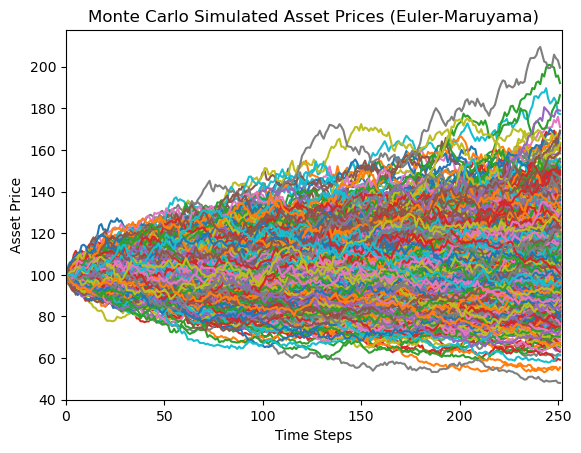

In [4]:
# Plot initial 100 simulated path using matplotlib
plt.plot(mc_initial.simulatepath('fixed'))
plt.xlabel('Time Steps')
plt.xlim(0,252)
plt.ylabel('Asset Price')
plt.title('Monte Carlo Simulated Asset Prices (Euler-Maruyama)')

In the graph above we can visualise a 1000 random walks of our underlying asset using the Euler-Maruyama scheme. This appears close to what a Geometric Brownian motion would look like for the random walks of our underlying asset, and is a computationally efficient approximation to the continous time process.  

We shall now pass the intial conditions as inputs into our option pricer class where : 

\begin{align*}
\text{Today's stock price} \quad S_{0} &= 100 \\
\text{Strike} \quad E &= 100 \\
\text{Time to expiry} \quad (T - t) &= 1 \\
\text{Volatility} \quad \sigma &= 20\% \\
\text{Constant risk-free rate} \quad r &= 5\% \\
\end{align*}

In [5]:
# Create instance of MonteCarloPricer with 100000 simulations to generate option prices
mc_pricer = MonteCarloPricer(S0=original_S0, strike=original_E, dte=original_T, sigma=original_sigma, rate=original_rate, nsim=100000)

In [6]:
# Visulise results in intial table
results_asian_initial = mc_pricer.calculate_asian_options('fixed')
results_lookback_initial = mc_pricer.calculate_lookback_options('fixed')
results_asian_floating_initial = mc_pricer.calculate_asian_options_floating('fixed')
results_lookback_floating_initial = mc_pricer.calculate_lookback_options_floating('fixed')

results_df_inital = mc_pricer.write_to_dataframe(results_asian_initial, results_lookback_initial, results_asian_floating_initial, results_lookback_floating_initial)
results_df_inital['Variation'] = results_df_inital['Variation'].fillna('None')

# Convert DataFrame to a nicely formatted table
table_initial = tabulate(results_df_inital, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".4f")

# Print the table
print("Results for our initial conditions:")
print(table_initial)


Results for our initial conditions:
╒═════════════╤════════════════════╤═══════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════╤══════════════════════╤══════════════════════════╤═════════════════════════╕
│ Variation   │   Fixed Asian Call │   Fixed Asian Put │   Fixed Lookback Call │   Fixed Lookback Put │   Floating Asian Call │   Floating Asian Put │   Floating Lookback Call │   Floating Lookback Put │
╞═════════════╪════════════════════╪═══════════════════╪═══════════════════════╪══════════════════════╪═══════════════════════╪══════════════════════╪══════════════════════════╪═════════════════════════╡
│ None        │             5.7453 │            3.3369 │               18.2997 │              11.7269 │                5.8242 │               3.3921 │                  16.5674 │                 13.4592 │
╘═════════════╧════════════════════╧═══════════════════╧═══════════════════════╧══════════════════════╧═══════════════════════╧═════════════════════

In the table above we can see the results for option prices for the intial conditions. As expected, the value of the Lookback options are higher than their Asian equivalents, and this is because of the extreme payoff that the Lookback option provides (difference between the max and min realised prices of an asset), and hence the value of these contracts are higher than the contract for which the payoff is determined by the average price of an asset over a given time period. 

Now we will vary one of the parameters at a time, allowing the values to vary between a predefined range, and we will generate plots from the dataframes to visualise and explain the effect that varying each one of these parameters has on the Asian and Looback option prices.

### Varying Volatility

In [7]:
# Creating table when varying volatilty 
results_asian_volatility = mc_pricer.calculate_asian_options(variation='volatility')
results_lookback_volatility = mc_pricer.calculate_lookback_options(variation='volatility')
results_asian_volatility_floating = mc_pricer.calculate_asian_options_floating(variation='volatility')
results_lookback_volatility_floating = mc_pricer.calculate_lookback_options_floating(variation='volatility')

results_df_volatility = mc_pricer.write_to_dataframe(
    results_asian_volatility, 
    results_lookback_volatility, 
    results_asian_volatility_floating, 
    results_lookback_volatility_floating
)

# Convert DataFrame to a nicely formatted table
table_vol = tabulate(results_df_volatility, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".4f")

# Print the table
print("Results for varying volatility:")
print(table_vol)

Results for varying volatility:
╒═════════════╤════════════════════╤═══════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════╤══════════════════════╤══════════════════════════╤═════════════════════════╕
│   Variation │   Fixed Asian Call │   Fixed Asian Put │   Fixed Lookback Call │   Fixed Lookback Put │   Floating Asian Call │   Floating Asian Put │   Floating Lookback Call │   Floating Lookback Put │
╞═════════════╪════════════════════╪═══════════════════╪═══════════════════════╪══════════════════════╪═══════════════════════╪══════════════════════╪══════════════════════════╪═════════════════════════╡
│      0.0000 │             2.4083 │            0.0000 │                4.8567 │               0.0000 │                2.4484 │               0.0000 │                   4.8567 │                  0.0000 │
├─────────────┼────────────────────┼───────────────────┼───────────────────────┼──────────────────────┼───────────────────────┼──────────────────────┼──

In [8]:
# Plot
fig = go.Figure()

# Add traces for Asian and Lookback with volatility as variation
fig.add_trace(go.Scatter(x=results_df_volatility['Variation'], y=results_df_volatility['Fixed Asian Call'], mode='lines', name='Fixed Asian Call'))
fig.add_trace(go.Scatter(x=results_df_volatility['Variation'], y=results_df_volatility['Fixed Asian Put'], mode='lines', name='Fixed Asian Put'))

# Update layout
fig.update_layout(title='Options Prices as Volatility Increases',
                   xaxis_title='Volatility',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [9]:
# Plot
fig = go.Figure()

# Add traces for Asian with volatility as variation
fig.add_trace(go.Scatter(x=results_df_volatility['Variation'], y=results_df_volatility['Fixed Lookback Call'], mode='lines', name='Fixed Lookback Call'))
fig.add_trace(go.Scatter(x=results_df_volatility['Variation'], y=results_df_volatility['Fixed Lookback Put'], mode='lines', name='Fixed Lookback Put'))

# Update layout
fig.update_layout(title='Options Prices as Volatility Increases',
                   xaxis_title='Volatility',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [10]:
# Plot
fig = go.Figure()

# Add traces for Floating Asian with volatility as variation
fig.add_trace(go.Scatter(x=results_df_volatility['Variation'], y=results_df_volatility['Floating Asian Call'], mode='lines', name='Floating Asian Call'))
fig.add_trace(go.Scatter(x=results_df_volatility['Variation'], y=results_df_volatility['Floating Asian Put'], mode='lines', name='Floating Asian Put'))

# Update layout
fig.update_layout(title='Options Prices as Volatility Increases',
                   xaxis_title='Volatility',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [11]:
# Find the index where the two lines intersect
intersection_index = (results_df_volatility['Floating Lookback Call'] - results_df_volatility['Floating Lookback Put']).abs().idxmin()

# Get the price at the intersection
intersection_vol = results_df_volatility.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Floating Lookback with volatility as variation
fig.add_trace(go.Scatter(x=results_df_volatility['Variation'], y=results_df_volatility['Floating Lookback Call'], mode='lines', name='Floating Lookback Call'))
fig.add_trace(go.Scatter(x=results_df_volatility['Variation'], y=results_df_volatility['Floating Lookback Put'], mode='lines', name='Floating Lookback Put'))

# Add markers for intersection point
fig.add_trace(go.Scatter(x=[intersection_vol], y=[results_df_volatility.loc[intersection_index, 'Floating Lookback Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))

# Update layout
fig.update_layout(title='Options Prices as Volatility Increases',
                   xaxis_title='Volatility',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

The first paramter we will vary is volatility, between 0-50% to see how this affects option price in the two graphs above. Interestingly we can see that, for both the Asian and Lookback puts, that when the volatility is set to zero, the price of the put becomes zero as well. The reason for this is because of what happens to our stochastic differential equation (3), when volatility or $\sigma$ goes to zero. Our equation now becomes : 

\begin{align*}
     dS_{t} = \mu S_{t} dt \tag{13}
\end{align*}
    

When $\sigma = 0$, our SDE is transformed such that the value of an option only depends on the growth rate or the drift of the underlying asset, and since there is no randomness anymore, the equation becomes deterministic. Since under the risk-neutral framework, our asset grows at the risk-free rate, and as this is postive (5%), this means that there is no chance of the asset decreasing in value, which makes the downside protection that a put offers worthless. The overall trend for the Asian and Lookback put as volatility increases is quite similar, as they both increase, with the Lookback put having a higher value at a $\sigma$ of 0.5 than its Asian equivalent, because of nature of its more extreme payoff. 

For the Asian and Lookback calls, both are non zero when $\sigma = 0$, since the price of the underlying is expected to increase under the risk neutral measure. The price of the Lookback is always higher than its Asian equivalent, and we can see for the higher volatilities that there is more of a divergence between the price of the Lookback call and the Lookback put when compared with the Asian call and Asian put. This can most likely be explained by the nature of their payoffs, and since the Lookback is the difference between the max and min price of the underlying vs the average over time for the Asian, the Lookback will be more sensitive to changes in volatility, and the Lookback call will be more sensitive to volatility than the Lookback put since under the risk neutral measure, the probability of the underlying increasing is higher than the probability of it decreasing, leading to this asymmetry with the value of the call. 

If we are to look at the graphs for the Floating options, we can see some interesting behaviour with the Lookbacks, whereas the graphs for the Asians are vary similar. They intersect at a volatility of roughly 33%, after which the value of the put becomes greater than the value of the call. One such explaination for this could be because, past a certain volatility threshold, the possible extreme price moves may benefit the put option holder more than a call option holder, due to increased downside risk of the underlying asset. 

### Varying Time to Expiry

The next parameter we shall vary is time to expiry:

In [12]:
# Creating table when varying time to expiry 
results_asian_time = mc_pricer.calculate_asian_options(variation='time')
results_lookback_time = mc_pricer.calculate_lookback_options(variation='time')
results_asian_time_floating = mc_pricer.calculate_asian_options_floating(variation='time')
results_lookback_time_floating = mc_pricer.calculate_lookback_options_floating(variation='time')

results_df_time = mc_pricer.write_to_dataframe(
    results_asian_time, 
    results_lookback_time, 
    results_asian_time_floating, 
    results_lookback_time_floating
)

# Convert DataFrame to a nicely formatted table
table_time = tabulate(results_df_time, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".4f")

# Print the table
print("Results for varying time to expiry:")
print(table_time)

Results for varying time to expiry:
╒═════════════╤════════════════════╤═══════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════╤══════════════════════╤══════════════════════════╤═════════════════════════╕
│   Variation │   Fixed Asian Call │   Fixed Asian Put │   Fixed Lookback Call │   Fixed Lookback Put │   Floating Asian Call │   Floating Asian Put │   Floating Lookback Call │   Floating Lookback Put │
╞═════════════╪════════════════════╪═══════════════════╪═══════════════════════╪══════════════════════╪═══════════════════════╪══════════════════════╪══════════════════════════╪═════════════════════════╡
│      0.0000 │             0.0000 │            0.0000 │                0.0000 │               0.0000 │                0.0000 │               0.0000 │                   0.0000 │                  0.0000 │
├─────────────┼────────────────────┼───────────────────┼───────────────────────┼──────────────────────┼───────────────────────┼─────────────────────

In [13]:
# Plot
fig = go.Figure()

# Add traces for Asian with time as variation
fig.add_trace(go.Scatter(x=results_df_time['Variation'], y=results_df_time['Fixed Asian Call'], mode='lines', name='Fixed Asian Call'))
fig.add_trace(go.Scatter(x=results_df_time['Variation'], y=results_df_time['Fixed Asian Put'], mode='lines', name='Fixed Asian Put'))

# Update layout
fig.update_layout(title='Options Prices as Time to Expiry Increases',
                   xaxis_title='Time to Expiry (Years)',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [14]:
# Plot
fig = go.Figure()

# Add traces for Lookback with time as variation
fig.add_trace(go.Scatter(x=results_df_time['Variation'], y=results_df_time['Fixed Lookback Call'], mode='lines', name='Fixed Lookback Call'))
fig.add_trace(go.Scatter(x=results_df_time['Variation'], y=results_df_time['Fixed Lookback Put'], mode='lines', name='Fixed Lookback Put'))

# Update layout
fig.update_layout(title='Options Prices as Time to Expiry Increases',
                   xaxis_title='Time to Expiry (Years)',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [15]:
# Plot
fig = go.Figure()

# Add traces for Floating Asian with time as variation
fig.add_trace(go.Scatter(x=results_df_time['Variation'], y=results_df_time['Floating Asian Call'], mode='lines', name='Floating Asian Call'))
fig.add_trace(go.Scatter(x=results_df_time['Variation'], y=results_df_time['Floating Asian Put'], mode='lines', name='Floating Asian Put'))

# Update layout
fig.update_layout(title='Options Prices as Time to Expiry Increases',
                   xaxis_title='Time to Expiry (Years)',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [16]:
# Plot
fig = go.Figure()

# Add traces for Floating Lookback with time as variation
fig.add_trace(go.Scatter(x=results_df_time['Variation'], y=results_df_time['Floating Lookback Call'], mode='lines', name='Floating Lookback Call'))
fig.add_trace(go.Scatter(x=results_df_time['Variation'], y=results_df_time['Floating Lookback Put'], mode='lines', name='Floating Lookback Put'))

# Update layout
fig.update_layout(title='Options Prices as Time to Expiry Increases',
                   xaxis_title='Time to Expiry (Years)',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

Above we have the two graphs to see the effect time to expiry has on option price. We can clearly see that, as time to expiry increases, the value of the Asian and Lookback options both increase, as there is more chance for the price of the underlying to move favorably for the option holder. 

If we consider the Asian call and put, we might think at first that, over a longer time period, the average volatility of the underling decreases which would cause the price to decrease too. However, as time to expiry increases, we are taking the average of the underlying over a longer period of time, and since the underlying follows a geometric Brownian motion, as time increases volatility or variance in the path of the underlying also increases. Thus, price increases as we increase time to expiry. 

The Lookback call displays similar behaviour, but for slighly different reasons. The reason the price of the call and put increase as time to expiry increases is because the range of values that the underlying asset can take increases over time (due to the nature of geometric Brownian motion), hence the value of the both call and put increases to factor in the increased probability of a higher payoff. 

As time to expiry increases for both the Asian and Lookback options, the difference in option price becomes more apparent for the Lookback call vs put at two years compared to the Asian call vs put at two years. This can by attributed to the increase in potential for extreme prices for the underlying further into the future, which affects the payoff of the Lookback more than the Asian, since the range will be more affected by extreme movements in price compared to the average.   

When varying time, there is not a significant difference difference in the graphs for Fixed vs Floating, but just minor differences in the price of the respective contracts, which will be to do with the fixed vs floating nature of the strikes. 

Both of these types of options are subject to time decay, or theta, since for Asian options, decreasing time to expiry reduces the potential for significant changes in the average price of the underlying, and for Lookback options, the range of possible values the underlying can take reduces too. Thus, the price of both types of options decreases as we get closer to expiry. 

### Varying Rates

In [17]:
# Creating table when rates
results_asian_rate = mc_pricer.calculate_asian_options(variation='rate')
results_lookback_rate = mc_pricer.calculate_lookback_options(variation='rate')
results_asian_rate_floating = mc_pricer.calculate_asian_options_floating(variation='rate')
results_lookback_rate_floating = mc_pricer.calculate_lookback_options_floating(variation='rate')

results_df_rate = mc_pricer.write_to_dataframe(
    results_asian_rate, 
    results_lookback_rate, 
    results_asian_rate_floating, 
    results_lookback_rate_floating
)

# Convert DataFrame to a nicely formatted table
table_rate = tabulate(results_df_rate, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".4f")

# Print the table
print("Results for varying rates:")
print(table_rate)

Results for varying rates:
╒═════════════╤════════════════════╤═══════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════╤══════════════════════╤══════════════════════════╤═════════════════════════╕
│   Variation │   Fixed Asian Call │   Fixed Asian Put │   Fixed Lookback Call │   Fixed Lookback Put │   Floating Asian Call │   Floating Asian Put │   Floating Lookback Call │   Floating Lookback Put │
╞═════════════╪════════════════════╪═══════════════════╪═══════════════════════╪══════════════════════╪═══════════════════════╪══════════════════════╪══════════════════════════╪═════════════════════════╡
│     -0.0500 │             3.5684 │            6.1433 │               14.1377 │              17.4372 │                3.4887 │               6.0378 │                  12.3132 │                 19.2617 │
├─────────────┼────────────────────┼───────────────────┼───────────────────────┼──────────────────────┼───────────────────────┼──────────────────────┼───────

In [18]:
# Find the index where the two lines intersect
intersection_index = (results_df_rate['Fixed Asian Call'] - results_df_rate['Fixed Asian Put']).abs().idxmin()

# Get the strike price at the intersection
intersection_rate = results_df_rate.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Asian with rate as variation
fig.add_trace(go.Scatter(x=results_df_rate['Variation'], y=results_df_rate['Fixed Asian Call'], mode='lines', name='Fixed Asian Call'))
fig.add_trace(go.Scatter(x=results_df_rate['Variation'], y=results_df_rate['Fixed Asian Put'], mode='lines', name='Fixed Asian Put'))

# Add markers for intersection point
fig.add_trace(go.Scatter(x=[intersection_rate], y=[results_df_rate.loc[intersection_index, 'Fixed Asian Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))

# Update layout
fig.update_layout(title='Options Prices as Rate Increases',
                   xaxis_title='Risk Free Rate',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [19]:
# Find the index where the two lines intersect
intersection_index = (results_df_rate['Fixed Lookback Call'] - results_df_rate['Fixed Lookback Put']).abs().idxmin()

# Get the strike price at the intersection
intersection_rate = results_df_rate.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Lookback with rate as variation
fig.add_trace(go.Scatter(x=results_df_rate['Variation'], y=results_df_rate['Fixed Lookback Call'], mode='lines', name='Fixed Lookback Call'))
fig.add_trace(go.Scatter(x=results_df_rate['Variation'], y=results_df_rate['Fixed Lookback Put'], mode='lines', name='Fixed Lookback Put'))

# Add markers for intersection point
fig.add_trace(go.Scatter(x=[intersection_rate], y=[results_df_rate.loc[intersection_index, 'Fixed Lookback Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))

# Update layout
fig.update_layout(title='Options Prices as Rate Increases',
                   xaxis_title='Risk Free Rate',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [20]:
# Find the index where the two lines intersect
intersection_index = (results_df_rate['Floating Asian Call'] - results_df_rate['Floating Asian Put']).abs().idxmin()

# Get the strike price at the intersection
intersection_rate = results_df_rate.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Floating Asian with rate as variation
fig.add_trace(go.Scatter(x=results_df_rate['Variation'], y=results_df_rate['Floating Asian Call'], mode='lines', name='Floating Asian Call'))
fig.add_trace(go.Scatter(x=results_df_rate['Variation'], y=results_df_rate['Floating Asian Put'], mode='lines', name='Floating Asian Put'))

# Add markers for intersection point
fig.add_trace(go.Scatter(x=[intersection_rate], y=[results_df_rate.loc[intersection_index, 'Floating Asian Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))

# Update layout
fig.update_layout(title='Options Prices as Rate Increases',
                   xaxis_title='Risk Free Rate',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [21]:
# Find the index where the two lines intersect
intersection_index = (results_df_rate['Floating Lookback Call'] - results_df_rate['Floating Lookback Put']).abs().idxmin()

# Get the strike price at the intersection
intersection_rate = results_df_rate.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Floating Lookback with rate as variation
fig.add_trace(go.Scatter(x=results_df_rate['Variation'], y=results_df_rate['Floating Lookback Call'], mode='lines', name='Floating Lookback Call'))
fig.add_trace(go.Scatter(x=results_df_rate['Variation'], y=results_df_rate['Floating Lookback Put'], mode='lines', name='Floating Lookback Put'))

# Add markers for intersection point
fig.add_trace(go.Scatter(x=[intersection_rate], y=[results_df_rate.loc[intersection_index, 'Floating Lookback Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))

# Update layout
fig.update_layout(title='Options Prices as Rate Increases',
                   xaxis_title='Risk Free Rate',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

Now, we have varied the risk-free rate, while keeping all other paramters constant, and have generated the two plots above. It is clear that, for both Asian and Lookback call options, increasing the risk-free rate has a positive impact on the price of these contracts, while increasing rates has a negative impact on the price of both of the puts. We can explain this behaviour if we consider the implications of being under the risk-neutral measure. Since we are under the risk-netural measure, we expect the price of the underlying asset to grow at the rate of $\mu$ (the drift), which equals the risk-free rate $r$. Thus increasing the rate $r$ increases the growth rate of our underyling asset, which causes call options to increase in value, and puts to lose value, since there is a lower chance of the underlying losing significant value as the growth rate increases. 

The Asian call and put (Fixed and Floating) display interesting behaviour when the rate approaches zero, as their price converges (and then crosses over in the opposite directions). This can be explained by considering our SDE from equation (3), and how it transforms when rates go to zero. Our SDE becomes driftless, i.e. a Martingale, and hence the price of the underlying asset depends only upon the random componet of the SDE, $dW_{T}$, or the Wiener process. Since the price of the asset will not increase in value steadily over time, but will simply fluctuate at random, there is essentially an equal chance of the asset moving up or down on average over a given period of time, leading to the same value for the Asian call and put when $r=0$. 

The Lookback call and put (Fixed) have this intersection point shifted slighly to the left, when rates are negative, and not when rates are zero. One possible reason for this could be because, when rates are zero, the behaviour of the underlying is purely governed by the random componet of the SDE (the Weiner process), which means there is a chance of a non zero payoff if say the max or min price realised by the asset is greater or less than the strike. Hence, both the call and put have value when rates are zero, and this intersection point is shifted to negative rates.

An interesting observation is that, for the Floating Lookback call and put, the intersection point is positive (around r = 0.018). This is because of the payoff structure being more dependant on the max or minimum price of the underlying, and as rates approach zero, this behaves in a Martingale fashion, where we have more chance of the underlying decreasing in value than gaining value due to zero drift. Thus, in anticipation of this, the prices crossover when rates are still positive, so the put is more expensive than the call when rates are zero.  

### Varying Strike

In [22]:
# Creating table when strike price
results_asian_strike = mc_pricer.calculate_asian_options(variation='strike')
results_lookback_strike = mc_pricer.calculate_lookback_options(variation='strike')
results_asian_strike_floating = mc_pricer.calculate_asian_options_floating(variation='strike')
results_lookback_strike_floating = mc_pricer.calculate_lookback_options_floating(variation='strike')

results_df_strike = mc_pricer.write_to_dataframe(
    results_asian_strike, 
    results_lookback_strike, 
    results_asian_strike_floating, 
    results_lookback_strike_floating
)

# Convert DataFrame to a nicely formatted table
table_strike = tabulate(results_df_strike, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".4f")

# Print the table
print("Results for varying strike:")
print(table_strike)

Results for varying strike:
╒═════════════╤════════════════════╤═══════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════╤══════════════════════╤══════════════════════════╤═════════════════════════╕
│   Variation │   Fixed Asian Call │   Fixed Asian Put │   Fixed Lookback Call │   Fixed Lookback Put │   Floating Asian Call │   Floating Asian Put │   Floating Lookback Call │   Floating Lookback Put │
╞═════════════╪════════════════════╪═══════════════════╪═══════════════════════╪══════════════════════╪═══════════════════════╪══════════════════════╪══════════════════════════╪═════════════════════════╡
│     50.0000 │            49.9699 │            0.0000 │               65.8611 │               0.0007 │                5.8242 │               3.3921 │                  16.5674 │                 13.4592 │
├─────────────┼────────────────────┼───────────────────┼───────────────────────┼──────────────────────┼───────────────────────┼──────────────────────┼──────

In [23]:
# Find the index where the two lines intersect
intersection_index = (results_df_strike['Fixed Asian Call'] - results_df_strike['Fixed Asian Put']).abs().idxmin()

# Get the strike price at the intersection
intersection_strike = results_df_strike.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Asian with strike as variation
fig.add_trace(go.Scatter(x=results_df_strike['Variation'], y=results_df_strike['Fixed Asian Call'], mode='lines', name='Fixed Asian Call'))
fig.add_trace(go.Scatter(x=results_df_strike['Variation'], y=results_df_strike['Fixed Asian Put'], mode='lines', name='Fixed Asian Put'))

# Add markers for intersection point
fig.add_trace(go.Scatter(x=[intersection_strike], y=[results_df_strike.loc[intersection_index, 'Fixed Asian Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))


# Update layout
fig.update_layout(title='Options Prices against Strike',
                   xaxis_title='Strike Price',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [24]:
# Find the index where the two lines intersect
intersection_index = (results_df_strike['Fixed Lookback Call'] - results_df_strike['Fixed Lookback Put']).abs().idxmin()

# Get the strike price at the intersection
intersection_strike = results_df_strike.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Lookback with strike as variation
fig.add_trace(go.Scatter(x=results_df_strike['Variation'], y=results_df_strike['Fixed Lookback Call'], mode='lines', name='Fixed Lookback Call'))
fig.add_trace(go.Scatter(x=results_df_strike['Variation'], y=results_df_strike['Fixed Lookback Put'], mode='lines', name='Fixed Lookback Put'))

# Add markers for intersection point
fig.add_trace(go.Scatter(x=[intersection_strike], y=[results_df_strike.loc[intersection_index, 'Fixed Lookback Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))

# Update layout
fig.update_layout(title='Options Prices against Strike',
                   xaxis_title='Strike Price',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)


Now, we have varied the strike price of our Asian and Looback options, to see how varying this affects the option price. For the Fixed Asian call, we can see that, the price starts of quite high, but decreases as strike price increases. We can understand why this happens if we consider the payoff formula in (4). As strike increases, the probability of the call ending up in the money decreases since the difference between the average and the strike reduces, thus resulting in a lower intrinsic value of the option. For the Fixed Asian put, we can see the opposite, since as the strike price increases, the value of the option increases with it. This is because of its inverse relationship with intrinsic value, so as strike increases, the intrinsic value increases as there is a greater difference between the strike and the underlying, leading to higher payoffs the higher in the money the option becomes. The Fixed Lookback options behave in a similar fashion to their Asian equivalents, with a slighly higher option price at low strike for the Lookback call  vs the Asian call, as well as the Asian calls price converging to zero faster than the Lookback calls price does. 

### Varying Price of Underlying

The final paramter we shall vary is the price of the underlying asset, to see how this affects the price of the different contracts: 

In [25]:
# Creating table when underlying price
results_asian_stock = mc_pricer.calculate_asian_options(variation='stock')
results_lookback_stock = mc_pricer.calculate_lookback_options(variation='stock')
results_asian_stock_floating = mc_pricer.calculate_asian_options_floating(variation='stock')
results_lookback_stock_floating = mc_pricer.calculate_lookback_options_floating(variation='stock')

results_df_stock = mc_pricer.write_to_dataframe(
    results_asian_stock, 
    results_lookback_stock, 
    results_asian_stock_floating, 
    results_lookback_stock_floating
)

# Convert DataFrame to a nicely formatted table
table_stock = tabulate(results_df_stock, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=".4f")

# Print the table
print("Results for varying underlying asset price:")
print(table_stock)

Results for varying underlying asset price:
╒═════════════╤════════════════════╤═══════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════╤══════════════════════╤══════════════════════════╤═════════════════════════╕
│   Variation │   Fixed Asian Call │   Fixed Asian Put │   Fixed Lookback Call │   Fixed Lookback Put │   Floating Asian Call │   Floating Asian Put │   Floating Lookback Call │   Floating Lookback Put │
╞═════════════╪════════════════════╪═══════════════════╪═══════════════════════╪══════════════════════╪═══════════════════════╪══════════════════════╪══════════════════════════╪═════════════════════════╡
│     50.0000 │             0.0000 │           46.3573 │                0.0030 │              53.4249 │                2.9121 │               1.6960 │                   8.2837 │                  6.7296 │
├─────────────┼────────────────────┼───────────────────┼───────────────────────┼──────────────────────┼───────────────────────┼─────────────

In [26]:
# Find the index where the two lines intersect
intersection_index = (results_df_stock['Fixed Asian Call'] - results_df_stock['Fixed Asian Put']).abs().idxmin()

# Get the strike price at the intersection
intersection_stock = results_df_stock.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Asian with underlying as variation
fig.add_trace(go.Scatter(x=results_df_stock['Variation'], y=results_df_stock['Fixed Asian Call'], mode='lines', name='Fixed Asian Call'))
fig.add_trace(go.Scatter(x=results_df_stock['Variation'], y=results_df_stock['Fixed Asian Put'], mode='lines', name='Fixed Asian Put'))

# Add markers for intersection point
fig.add_trace(go.Scatter(x=[intersection_stock], y=[results_df_stock.loc[intersection_index, 'Fixed Asian Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))

# Update layout
fig.update_layout(title='Options Prices as Underlying Increases',
                   xaxis_title='Underlying Price',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [27]:
# Find the index where the two lines intersect
intersection_index = (results_df_stock['Fixed Lookback Call'] - results_df_stock['Fixed Lookback Put']).abs().idxmin()

# Get the strike price at the intersection
intersection_stock = results_df_stock.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Lookback with underlying as variation
fig.add_trace(go.Scatter(x=results_df_stock['Variation'], y=results_df_stock['Fixed Lookback Call'], mode='lines', name='Fixed Lookback Call'))
fig.add_trace(go.Scatter(x=results_df_stock['Variation'], y=results_df_stock['Fixed Lookback Put'], mode='lines', name='Fixed Lookback Put'))

# Add markers for intersection point
fig.add_trace(go.Scatter(x=[intersection_stock], y=[results_df_stock.loc[intersection_index, 'Fixed Lookback Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))

# Update layout
fig.update_layout(title='Options Prices as Underlying Increases',
                   xaxis_title='Underlying Price',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [28]:
# Find the index where the two lines intersect
intersection_index = (results_df_stock['Floating Asian Call'] - results_df_stock['Floating Asian Put']).abs().idxmin()

# Get the strike price at the intersection
intersection_stock = results_df_stock.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Floating Asian with underlying as variation
fig.add_trace(go.Scatter(x=results_df_stock['Variation'], y=results_df_stock['Floating Asian Call'], mode='lines', name='Floating Asian Call'))
fig.add_trace(go.Scatter(x=results_df_stock['Variation'], y=results_df_stock['Floating Asian Put'], mode='lines', name='Floating Asian Put'))

# Add markers for intersection point
#fig.add_trace(go.Scatter(x=[intersection_stock], y=[results_df_stock.loc[intersection_index, 'Floating Asian Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))

# Update layout
fig.update_layout(title='Options Prices as Underlying Increases',
                   xaxis_title='Underlying Price',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

In [29]:
# Find the index where the two lines intersect
intersection_index = (results_df_stock['Floating Lookback Call'] - results_df_stock['Floating Lookback Put']).abs().idxmin()

# Get the strike price at the intersection
intersection_stock = results_df_stock.loc[intersection_index, 'Variation']

# Plot
fig = go.Figure()

# Add traces for Floating Lookback with underlying as variation
fig.add_trace(go.Scatter(x=results_df_stock['Variation'], y=results_df_stock['Floating Lookback Call'], mode='lines', name='Floating Lookback Call'))
fig.add_trace(go.Scatter(x=results_df_stock['Variation'], y=results_df_stock['Floating Lookback Put'], mode='lines', name='Floating Lookback Put'))

# Add markers for intersection point
#fig.add_trace(go.Scatter(x=[intersection_stock], y=[results_df_stock.loc[intersection_index, 'Floating Lookback Call']], mode='markers', name='Intersection', marker=dict(size=10, color='green')))

# Update layout
fig.update_layout(title='Options Prices as Underlying Increases',
                   xaxis_title='Underlying Price',
                   yaxis_title='Option Price')

# Show plot inline in Jupyter Notebook
iplot(fig)

The behaviour visible in the two plots above is very similar to that of the graphs when we varied the strike price instead of the underlying asset price for the Fixed Asian and Lookback options. For the Asian options in particular, the graphs are quite similar, most likely because the payoff of the Asian depends on the average price of the underlying asset over a given time period. Thus, changing the inital price of the underlying or changing the strike can be seen to have a similar effect on the option price, due to the smoothing effect that taking the average price of the underlying has on the payoff. However one point to notice for both the Asian and Lookback options is that the crossover point is shifted slightly further left when we vary the underlying price, which indicates that changes to the underlying price might have a greater effect on the price of these options when compared with changes in the strike price. 

For the Floating Asian and Lookback options, the key difference is that the prices of the calls and puts do not intersect. We can see that the prices for both tend towards zero, because given the payoff, as $S_t$ tends towards so will $S_{max}$ and $S_{min}$. However, the prices of these will continue to increase as underlying price increases, but there will not be a huge divergance between the payoffs of the calls and puts as time goes to infinity. 



## Drawbacks, Improvements & Conclusions 

In this report, we have used the Euler-Maryuama scheme as a disretised verison to simulate the random paths that our underlying asset can take, and then used the Monte Carlo method to calculate the price of our exotic options and we have also varied our intial parameters to see how changing these effects option price. We do have some drawbacks with the methodology used in this report, and we will aim to present some alternative methods and techniques that could be used to further improve the quality of the data. 

The first area for improvement lies with the use of the Euler-Maryuama (EM) method to simulate the paths that our underlying asset can take. Despite the ease of implementation, one of the limitations of the EM method is in its rate of convergence, which is strong convergence of order 1/2. This means that, the error between the numerical solution and the exact solution reduces as the step size decreaes, but this only reduces at a rate of:  

\begin{align*}
    \epsilon = O(\sqrt{\delta t}) \tag{14}
\end{align*}

Thus, for small step sizes ($\delta t$), the rate of convergence and thus the error reduction will be slow. One alternative scheme that can be used to tackle this is the Milstein Scheme, which improves on the rate of convergance by achieveing a strong order of convergence of order 1 ($O(\delta t)$). The equation for the Milstein scheme is as follows : 

\begin{align*}
    S_{t+\delta t} = S_{t}(1 + \mu \delta t + \sigma \phi \sqrt{\delta t} + \sigma^{2}(\phi^{2} - 1)\delta t) \tag{15}
\end{align*}


The Milstein scheme does have its own disadvantages however, notably that it becomes computationally complex very quickly in higher dimensions. 

Another area for improvement would be considering additional variations to Asian and Lookback options that we could look to model for more detailed results on how varying parameters affects different subtypes of these exotic contracts. Most notably, we did not look into Geometric or exponentially weighted average Asian options, and we did not look into Lookback options where the maxima and minima are continuously sampled instead of discretely sampled. 

There are some closed form formulae we did not look into as well for Asian options, such as the closed form approximations for arithmetically averaged Asians as proposed by Turnbull and Wakeman (1991). We can see these below:

\begin{align*}
    C_{\text{Arith}} &= e^{-r(T - t)} \left[ S_0 e^{(b - \frac{\sigma^2}{2})(T - t)} \Phi(d_1) - E \Phi(d_2) \right] \tag{16} \\ 
    P_{\text{Arith}} &= e^{-r(T - t)} \left[ E \Phi(-d_2) - S_0 e^{(b - \frac{\sigma^2}{2})(T - t)} \Phi(-d_1) \right] \tag{17} \\ 
\end{align*}

Where $C_{Arith}$ / $P_{Arith}$ is the arithmetic Asian call/put option price,  $\Phi()$ is the cumulative distribution function of the standard normal distribution, $b$ is the cost of carry, and $d_1$ and $d_2$ are variables defined from the Black-Scholes formula.  Lookback options on the other hand do not have readily available closed-form solutions, due to their payoff structure being more complicated as a result of the dependance on maximum or minimum price of the underyling in a given period of time.

One final area of improvemnt would be in terms of the Monte Carlo method. Despite the fact that it was relatively easier to code and deploy an option pricing model using the Monte Carlo Method, it is quite computationally expensive, especially for a high number of simulations (>100,000). Additionally, it is difficult to compute the Greeks using this method, and hence it is hard for us to see more in depth insights regarding the sensitivities/ rates of change of our options to time, volatility etc. One solution to this is to leverage the partial differential equation (PDE) approach, using the Black Scholes equation and applying the relevant boundary conditions for both Asian and Lookback options, and then using the Finite Difference Method to approximate a solution to this PDE. Let us see the Black Scholes equation below:
 

\begin{align*}
    
\frac{\partial V}{\partial t} + rS \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} - rV = 0 \tag{18}

\end{align*}

Where the boundary conditions for Asian and Lookback call would be $V(S, T) = max(A - E, 0)$ and $V(S, T) = max(M - E, 0)$ respectively (please refer back to (4) and (8) for the full definition of these boundary conditions).

To summarise, in this report we have observed the effect that varying certain parameters has on the impact on the prices of our options, by leveraging the Monte Carlo method to build a framework to price these contracts. We could see in general how Lookback options are more expensive than Asians, which we can attribute as a result of their more extreme payoff profile, and we varied our initial parameters for different subtypes of Asian and Lookback options to see how these changes influence the price of these options. We have also laid the foundation for further expansion on this research to calculate the Greeks from the Black-Scholes equation, and to potentially leverage more sophisticated models such as the Heston model for volatility (1993)  and the Vasicek model for interest rates (1977), to bring these models further away from our risk-neutral world, and closer towards the behaviour of assets in the real, everyday world. 


## References 

Carr, P., Ewald, C.O., & Xiao, Y. (2008). On the qualitative effect of volatility and duration on prices of Asian options. *Finance Research Letters, 5*(3), 162-171.

Haug, E.G. (2006). *The Complete Guide to Option Pricing Formulas* (2nd ed.). McGraw-Hill.

Hobson, D.G. (1998). Robust hedging of the lookback option. *Finance and Stochastics, 2*, 329-347.

Jackel, P. (2002). *Monte Carlo methods in finance*.

Rouah, F.D. (2011). Euler and Milstein discretization. *Documento de trabajo, Sapient Global Markets, Estados Unidos*. Recuperado de www.frouah.com, 87, 88.

Wilmott, P. (2006). *Paul Wilmott on Quantitative Finance I & II*.

Zhang, H. (2009). Pricing Asian Options using Monte Carlo Methods.